In [1]:
import pandas as pd
import pickle
from dataset_evaluation import ESCO_DIR
import seaborn as sns
import numpy as np

Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertModel were not initialized from the model checkpoint at jjzha/jobbert-base-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
with open(ESCO_DIR + "test.json") as f:
    testsp = pd.DataFrame(eval(f.read().replace("\n", ",")))
    testsp.columns = ["idx", "sentence", "skills"]

with open(ESCO_DIR + "dev.json") as f:
    devsp = pd.DataFrame(eval(f.read().replace("\n", ",")))
    devsp.columns = ["idx", "sentence", "skills"]

In [8]:
sppreds = pd.read_csv("classifiier_outputs/epfl_skillspan_preds.out", sep="\t")
sppreds["predictions"] = sppreds["predictions"].apply(eval)
sppreds["gold"] = sppreds["gold"].apply(eval)
sppreds["sentence"] = testsp["sentence"]

In [28]:
from collections import Counter
Counter(sum(list(sppreds["predictions"].values), []))

Counter({'UNK': 71,
         'communicate with stakeholders': 26,
         'develop automated software tests': 20,
         'create solutions to problems': 17,
         'teamwork principles': 15,
         'perform data analysis': 14,
         'provide technical documentation': 14,
         'software frameworks': 14,
         'develop ICT test suite': 11,
         'deploy cloud resource': 11,
         'JavaScript': 11,
         'manage relationships with stakeholders': 10,
         'translate texts': 10,
         'quality assurance procedures': 10,
         'manage sales channels': 10,
         'develop test procedures': 10,
         'ASP.NET': 10,
         'use databases': 10,
         'lead a team': 9,
         'create prototype of user experience solutions': 9,
         'conduct ICT code review': 9,
         'control financial resources': 9,
         'microscopic techniques': 9,
         'operate microscope': 9,
         'C#': 9,
         'manage schedule of tasks': 8,
         'qual

In [11]:
decpreds = pd.read_csv("classifiier_outputs/decorte_skillspan.out", sep="\t")
decpreds["predictions"] = decpreds["predictions"].apply(eval)
decpreds["gold"] = decpreds["gold"].apply(eval)
decpreds["sentence"] = testsp["sentence"]

In [30]:
from collections import Counter
Counter(sum(list(decpreds["predictions"].values), []))

Counter({'Java (computer programming)': 14,
         'cloud technologies': 9,
         'Agile development': 8,
         'develop with cloud services': 8,
         'tools for ICT test automation': 7,
         'cooperate with colleagues': 6,
         'Agile project management': 6,
         'perform software unit testing': 6,
         'conduct ICT code review': 6,
         'apply teaching strategies': 6,
         'quality assurance procedures': 6,
         'supply chain management': 5,
         'publish academic research': 5,
         'sales activities': 5,
         'DevOps': 5,
         'automation technology': 5,
         'operate microscope': 5,
         'financial engineering': 5,
         'C#': 5,
         'quality assurance methodologies': 5,
         'offer financial services': 5,
         'Visual Studio .NET': 5,
         'apply strategic thinking': 4,
         'discuss research proposals': 4,
         'analyse cell cultures': 4,
         'inform visitors at tour sites': 4,
      

In [7]:
### For new preds

TP = decpreds.explode("predictions")[["predictions", "gold"]].apply(
    lambda x : x["predictions"] in x["gold"]
, axis=1).sum() ## TP

FP = decpreds.explode("predictions")[["predictions", "gold"]].apply(
    lambda x : x["predictions"] not in x["gold"]
, axis=1).sum()

FN = decpreds.explode("gold")[["predictions", "gold"]].apply(
    lambda x : x["gold"] not in x["predictions"]
, axis=1).sum()


P = TP / (TP + FP)
R = TP / (TP + FN)

print("f1 : ", 2*R*P / (P + R))

f1 :  0.21208053691275167


In [19]:
### For new preds

TP = sppreds.explode("predictions")[["predictions", "gold"]].apply(
    lambda x : x["predictions"] in x["gold"]
, axis=1).sum() ## TP

FP = sppreds.explode("predictions")[["predictions", "gold"]].apply(
    lambda x : x["predictions"] not in x["gold"]
, axis=1).sum()

FN = sppreds.explode("gold")[["predictions", "gold"]].apply(
    lambda x : x["gold"] not in x["predictions"]
, axis=1).sum()


P = TP / (TP + FP) if (TP + FP != 0) else 0
R = TP / (TP + FN) if (TP + FN != 0) else 0

print("f1 : ", 2*R*P / (P + R) if (P + R) != 0 else 0)

f1 :  0.20458819104926668


## Studying the discriminant of the prediiction

In [9]:
sppreds

,predictions,gold,sentence
0,[],"[UNK, apply person-centred care]",Work in a way that is patient-centred and incl...
1,[],"[develop patient treatment strategies, formula...",Provide your patients with a safe and effectiv...
2,[keep up with digital transformation of indust...,[UNK],See IT systems as an aid in your work and do w...
3,[reinforce positive behaviour],"[UNK, practice humour]",Be good humoured loyal dedicated and flexible .
4,"[communicate with stakeholders, engage passers...","[engage passers-by in conversation, promote th...",As a promotor you therefore need to engage peo...
...,...,...,...
746,[],[UNK],High aspiration for quality balanced with a go...
747,"[quality assurance methodologies, quality assu...",[quality assurance methodologies],You understand quality assurance as a task of ...
748,"[emergent technologies, keep up with digital t...",[emergent technologies],Independently and quick adoption of new techno...
749,[communicate with stakeholders],"[UNK, communicate with target community]",Willingness to speak at conferences and engage...


In [10]:
from warnings import filterwarnings
filterwarnings('ignore')

Research question :

- Which model is better at getting negative samples (=> SkillThrills)
- Which model performs better when ignoring negative samples
- 

In [12]:
def state_on_conditional_df(subdf):
    TP = subdf.explode("predictions")[["predictions", "gold"]].apply(
    lambda x : x["predictions"] in x["gold"]
    , axis=1).sum() ## TP

    FP = subdf.explode("predictions")[["predictions", "gold"]].apply(
        lambda x : x["predictions"] not in x["gold"]
    , axis=1).sum()

    FN = subdf.explode("gold")[["predictions", "gold"]].apply(
        lambda x : x["gold"] not in x["predictions"]
    , axis=1).sum()

    P = TP / (TP + FP) if (TP + FP != 0) else 0
    R = TP / (TP + FN) if (TP + FN != 0) else 0
    f1 = 2*R*P / (P + R) if (P + R) != 0 else 0
    print("R : ", R)
    print("P : ", P)
    print("f1 : ", 2*R*P / (P + R) if (P + R) != 0 else 0)
    return P, R, f1


## negative samples :
state_on_conditional_df(
    sppreds[
        ~(sppreds.gold.apply(lambda x : len(x)).astype(bool))
        | (sppreds.gold.apply(lambda x : x == ["UNK"]).astype(bool))
    ]
)

state_on_conditional_df(
    decpreds[
        ~(decpreds.gold.apply(lambda x : len(x)).astype(bool))
        | (decpreds.gold.apply(lambda x : x == ["UNK"]).astype(bool))
    ]
)

R :  0.13852813852813853
P :  0.10631229235880399
f1 :  0.12030075187969926
R :  0.0
P :  0.0
f1 :  0


(0.0, 0.0, 0)

In [72]:
## Only positive samples

state_on_conditional_df(
    sppreds[
        (sppreds.gold.apply(lambda x : len(x)).astype(bool))
        & (sppreds.gold.apply(lambda x : "UNK" not in x).astype(bool))
    ]
)

state_on_conditional_df(
    decpreds[
        (decpreds.gold.apply(lambda x : len(x)).astype(bool))
        & (decpreds.gold.apply(lambda x : "UNK" not in x).astype(bool))
    ]
)

R :  0.29829545454545453
P :  0.29329608938547486
f1 :  0.29577464788732394
R :  0.33238636363636365
P :  0.5
f1 :  0.3993174061433447


(0.5, 0.33238636363636365, 0.3993174061433447)

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
decpreds["st_len"] = decpreds["sentence"].apply(lambda x : len(tokenizer.tokenize(x)))
sppreds["st_len"] = sppreds["sentence"].apply(lambda x : len(tokenizer.tokenize(x)))
sns.histplot(
    data=decpreds,
    x="st_len"
)


decpreds.st_len.describe()

In [73]:
lowq = np.percentile(decpreds.st_len, 25)
med = np.percentile(decpreds.st_len, 50)
topq = np.percentile(decpreds.st_len, 75)


def stat_for_sentence_length(df):

    low = df[df.st_len < lowq]
    midlow = df[(df.st_len >= lowq) & (df.st_len < med)]
    midtop = df[(df.st_len >= med) & (df.st_len < topq)]
    top = df[df.st_len > topq]

    
    print("SHORT SENTENCE 1  (LOW QUARTILE more than", lowq, " words)")
    f1low = state_on_conditional_df(low)[2]
    
    print("SHORT SENTENCE 2 (MIDLOW QUARTILE between ", (lowq, med), " words)")
    f1midlow = state_on_conditional_df(midlow)[2]

    print("LONGER SENTENCE (MIDTOP QUARTILE  between", (med, topq), " words)")
    f1midtop =state_on_conditional_df(midtop)[2]

    print("LONG SENTENCE (TOP QUARTILE more than", (topq), " words)")
    f1top = state_on_conditional_df(top)[2]
    return [f1low, f1midlow, f1midtop, f1top]

print("*"*25, "GESYCA :", "*"*25)
f1s_sp = stat_for_sentence_length(sppreds)
print("*"*25, "DECORTE :", "*"*25)
f1s_dec = stat_for_sentence_length(decpreds)

************************* GESYCA : *************************
SHORT SENTENCE 1  (LOW QUARTILE more than 7.5  words)
R :  0.21935483870967742
P :  0.24727272727272728
f1 :  0.23247863247863249
SHORT SENTENCE 2 (MIDLOW QUARTILE between  (7.5, 12.0)  words)
R :  0.24031007751937986
P :  0.24313725490196078
f1 :  0.24171539961013647
LONGER SENTENCE (MIDTOP QUARTILE  between (12.0, 20.0)  words)
R :  0.20059880239520958
P :  0.22112211221122113
f1 :  0.21036106750392464
LONG SENTENCE (TOP QUARTILE more than 20.0  words)
R :  0.13402061855670103
P :  0.18840579710144928
f1 :  0.15662650602409636
************************* DECORTE : *************************
SHORT SENTENCE 1  (LOW QUARTILE more than 7.5  words)
R :  0.24838709677419354
P :  0.39086294416243655
f1 :  0.3037475345167653
SHORT SENTENCE 2 (MIDLOW QUARTILE between  (7.5, 12.0)  words)
R :  0.17829457364341086
P :  0.26285714285714284
f1 :  0.21247113163972287
LONGER SENTENCE (MIDTOP QUARTILE  between (12.0, 20.0)  words)
R :  0.1407

<Axes: xlabel='quantiles', ylabel='f1sp'>

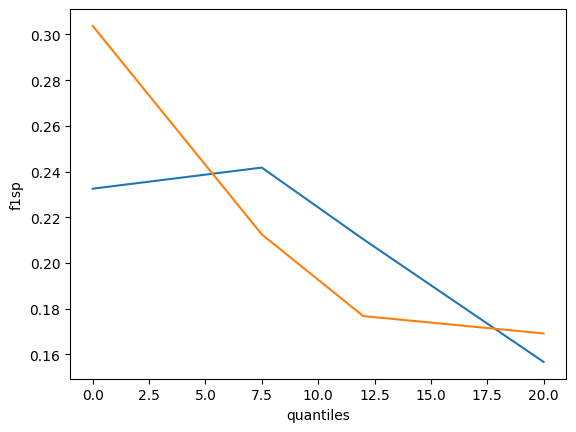

In [74]:
sns.lineplot(
        pd.DataFrame.from_dict({
        'quantiles': [0, lowq, med, topq],
        'f1sp': f1s_sp,
    }), x="quantiles", y="f1sp" 
)

sns.lineplot(
        pd.DataFrame.from_dict({
        'quantiles': [0, lowq, med, topq],
        'f1dec': f1s_dec,
    }), x="quantiles", y="f1dec" 
)

In [75]:
def stat_for_sentence_length(df):

    equalpop_splits = [df.st_len.min()] + [np.percentile(decpreds.st_len, i*10) for i in range(1, 10)] + [df.st_len.max()]
    splits = []
    stats = []
    for i, split in enumerate(equalpop_splits[:-1]):
        splits.append(
            df[(df.st_len >= split) & (df.st_len < equalpop_splits[i + 1])]
        )

        stats.append([[split, equalpop_splits[i + 1]], state_on_conditional_df(splits[-1])[2]])
    return stats
    
decstats = stat_for_sentence_length(decpreds)
spstats = stat_for_sentence_length(sppreds)

R :  0.3373493975903614
P :  0.4444444444444444
f1 :  0.3835616438356164
R :  0.23943661971830985
P :  0.40476190476190477
f1 :  0.30088495575221236
R :  0.17647058823529413
P :  0.3
f1 :  0.22222222222222224
R :  0.1357142857142857
P :  0.20212765957446807
f1 :  0.16239316239316237
R :  0.2288135593220339
P :  0.3333333333333333
f1 :  0.27135678391959794
R :  0.16447368421052633
P :  0.26595744680851063
f1 :  0.2032520325203252
R :  0.1259259259259259
P :  0.2125
f1 :  0.15813953488372093
R :  0.18
P :  0.3375
f1 :  0.23478260869565212
R :  0.1358695652173913
P :  0.3048780487804878
f1 :  0.18796992481203006
R :  0.0778688524590164
P :  0.21348314606741572
f1 :  0.11411411411411412
R :  0.1686746987951807
P :  0.175
f1 :  0.17177914110429446
R :  0.2605633802816901
P :  0.29838709677419356
f1 :  0.2781954887218045
R :  0.2
P :  0.23943661971830985
f1 :  0.21794871794871795
R :  0.2357142857142857
P :  0.2391304347826087
f1 :  0.23741007194244607
R :  0.2457627118644068
P :  0.24786324

In [76]:
decstats, spstats

([[[1, 5.0], 0.3835616438356164],
  [[5.0, 7.0], 0.30088495575221236],
  [[7.0, 8.0], 0.22222222222222224],
  [[8.0, 10.0], 0.16239316239316237],
  [[10.0, 12.0], 0.27135678391959794],
  [[12.0, 15.0], 0.2032520325203252],
  [[15.0, 19.0], 0.15813953488372093],
  [[19.0, 23.0], 0.23478260869565212],
  [[23.0, 29.0], 0.18796992481203006],
  [[29.0, 104], 0.11411411411411412]],
 [[[1, 5.0], 0.17177914110429446],
  [[5.0, 7.0], 0.2781954887218045],
  [[7.0, 8.0], 0.21794871794871795],
  [[8.0, 10.0], 0.23741007194244607],
  [[10.0, 12.0], 0.24680851063829787],
  [[12.0, 15.0], 0.22295081967213112],
  [[15.0, 19.0], 0.1606425702811245],
  [[19.0, 23.0], 0.22695035460992907],
  [[23.0, 29.0], 0.18125],
  [[29.0, 104], 0.13032581453634084]])

(1, 5.0, 7.0, 8.0, 10.0, 12.0, 15.0, 19.0, 23.0, 29.0)
(1, 5.0, 7.0, 8.0, 10.0, 12.0, 15.0, 19.0, 23.0, 29.0)


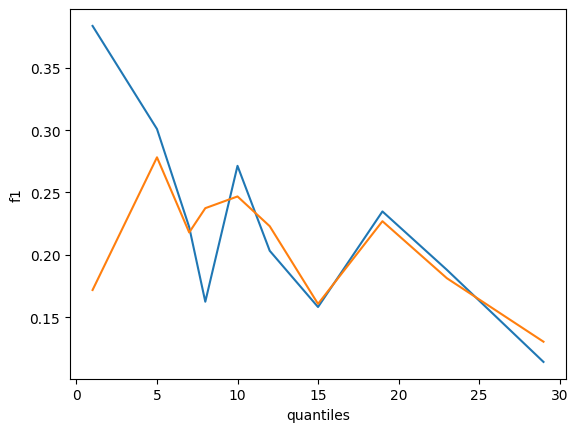

In [77]:
def plot_evolution(stats):
    bins, f1s = zip(*stats)
    bins = list(zip(*bins))[0]
    print(bins)

    sns.lineplot(
            pd.DataFrame.from_dict({
            'quantiles': bins,
            'f1': f1s,
        }), x="quantiles", y="f1" 
)
plot_evolution(decstats)
plot_evolution(spstats)

### Implicitness of the label :

In [78]:
full_explicit_labels = decpreds[decpreds[["gold", "sentence"]].apply(
    lambda x : any(y in x["sentence"] for y in x["gold"] if y != "UNK")
, axis=1)]
state_on_conditional_df(full_explicit_labels)

R :  0.24736842105263157
P :  0.6911764705882353
f1 :  0.3643410852713178


(0.6911764705882353, 0.24736842105263157, 0.3643410852713178)

In [79]:
full_explicit_labels = sppreds[sppreds[["gold", "sentence"]].apply(
    lambda x : any(y in x["sentence"] for y in x["gold"] if y != "UNK")
, axis=1)]
state_on_conditional_df(full_explicit_labels)

R :  0.22631578947368422
P :  0.3028169014084507
f1 :  0.25903614457831325


(0.3028169014084507, 0.22631578947368422, 0.25903614457831325)

In [80]:
implicit_labels = decpreds[decpreds[["gold", "sentence"]].apply(
    lambda x : not any(y in x["sentence"] for y in x["gold"] if y != "UNK")
, axis=1)]
state_on_conditional_df(implicit_labels)

R :  0.15236567762630313
P :  0.2602739726027397
f1 :  0.19221041982802226


(0.2602739726027397, 0.15236567762630313, 0.19221041982802226)

In [81]:
implicit_labels = sppreds[sppreds[["gold", "sentence"]].apply(
    lambda x : not any(y in x["sentence"] for y in x["gold"] if y != "UNK")
, axis=1)]
state_on_conditional_df(implicit_labels)

R :  0.18364073777064957
P :  0.21203703703703702
f1 :  0.19681993983669963


(0.21203703703703702, 0.18364073777064957, 0.19681993983669963)

<Axes: xlabel='inter', ylabel='Count'>

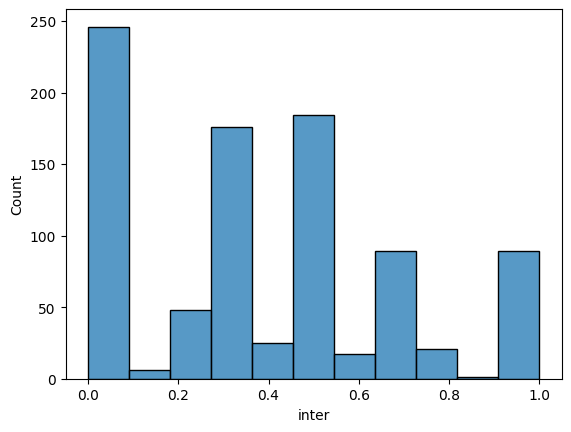

In [94]:
def gold_and_sentence_inter(gold, sentence):
    goldw = list(set(tokenizer.tokenize(gold)))
    return len([w for w in goldw if w in sentence]) / len(goldw)

exdecpreds = decpreds.explode("gold")
exdecpreds = exdecpreds[exdecpreds.gold != "UNK"]
exdecpreds["inter"]  = exdecpreds[["gold", "sentence"]].apply(
    lambda x : gold_and_sentence_inter(x["gold"], x["sentence"])
, axis=1)

sns.histplot(
    data=exdecpreds,
    x="inter"
)

In [98]:
full_implicit = exdecpreds[exdecpreds.inter == 0]
full_implicit[["gold", "predictions"]].apply(
    lambda x : x["gold"] in x["predictions"], axis=1
).mean()

0.21138211382113822

In [99]:
exsppreds = sppreds.explode("gold")
exsppreds = exsppreds[exsppreds.gold != "UNK"]
exsppreds["inter"]  = exsppreds[["gold", "sentence"]].apply(
    lambda x : gold_and_sentence_inter(x["gold"], x["sentence"])
, axis=1)


full_implicit = exsppreds[exsppreds.inter == 0]
full_implicit[["gold", "predictions"]].apply(
    lambda x : x["gold"] in x["predictions"], axis=1
).mean()

0.1910569105691057

In [103]:
def agg(gdf):
    return gdf[["gold", "predictions"]].apply(
        lambda x : x["gold"] in x["predictions"], axis=1
    ).mean()
exdecpreds["qinter"] = pd.cut(exdecpreds["inter"], bins = [0, 0.25, 0.5, 0.75, 1])
exdecpreds.groupby("qinter").apply(agg)

qinter
(0.0, 0.25]    0.333333
(0.25, 0.5]    0.233766
(0.5, 0.75]    0.292683
(0.75, 1.0]    0.436170
dtype: float64

In [102]:
def agg(gdf):
    return gdf[["gold", "predictions"]].apply(
        lambda x : x["gold"] in x["predictions"], axis=1
    ).mean()
exsppreds["qinter"] = pd.cut(exsppreds["inter"], bins = [0, 0.25, 0.5, 0.75, 1])
exsppreds.groupby("qinter").apply(agg)

qinter
(0.0, 0.25]    0.259259
(0.25, 0.5]    0.205195
(0.5, 0.75]    0.341463
(0.75, 1.0]    0.361702
dtype: float64

### Study the number of labels

assumption, the more labels there are ==> the better the prediction for GSP

<Axes: xlabel='nb_labels', ylabel='Count'>

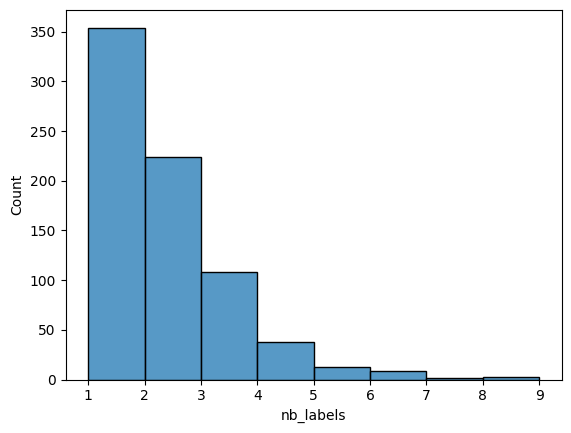

In [105]:
decpreds["nb_labels"] = decpreds["gold"].apply(len)
sns.histplot(
    data=decpreds, 
    x="nb_labels",
    binwidth=1
)

In [106]:
state_on_conditional_df(decpreds[decpreds.nb_labels == 1])

R :  0.18361581920903955
P :  0.1752021563342318
f1 :  0.17931034482758623


(0.1752021563342318, 0.18361581920903955, 0.17931034482758623)

In [108]:
state_on_conditional_df(decpreds[decpreds.nb_labels > 3])

R :  0.10289389067524116
P :  0.43243243243243246
f1 :  0.16623376623376623


(0.43243243243243246, 0.10289389067524116, 0.16623376623376623)

In [127]:
CLIP = 7
sppreds["nb_labels"] = sppreds["gold"].apply(len)
decpreds["nb_labels"] = decpreds["gold"].apply(len)
sppreds["nb_labels"] = sppreds["nb_labels"].apply(lambda x : x if x < CLIP else CLIP) ## clipped at 6
decpreds["nb_labels"] = decpreds["nb_labels"].apply(lambda x : x if x < CLIP else CLIP) ## clipped at 6

sp_nblabelsres = sppreds.groupby("nb_labels").apply(state_on_conditional_df)
dec_nblabelsres = decpreds.groupby("nb_labels").apply(state_on_conditional_df)

R :  0.22033898305084745
P :  0.15853658536585366
f1 :  0.1843971631205674
R :  0.203125
P :  0.24202127659574468
f1 :  0.220873786407767
R :  0.19135802469135801
P :  0.2980769230769231
f1 :  0.23308270676691728
R :  0.14473684210526316
P :  0.275
f1 :  0.18965517241379312
R :  0.1076923076923077
P :  0.30434782608695654
f1 :  0.15909090909090912
R :  0.18518518518518517
P :  0.3125
f1 :  0.2325581395348837
R :  0.05
P :  0.18181818181818182
f1 :  0.07843137254901962
R :  0.18361581920903955
P :  0.1752021563342318
f1 :  0.17931034482758623
R :  0.20089285714285715
P :  0.3829787234042553
f1 :  0.26354319180087854
R :  0.15432098765432098
P :  0.423728813559322
f1 :  0.22624434389140272
R :  0.13157894736842105
P :  0.46511627906976744
f1 :  0.20512820512820512
R :  0.03076923076923077
P :  0.125
f1 :  0.04938271604938272
R :  0.1111111111111111
P :  0.6
f1 :  0.18750000000000003
R :  0.1
P :  0.8
f1 :  0.1777777777777778


<Axes: xlabel='nb_labels', ylabel='$F_1$'>

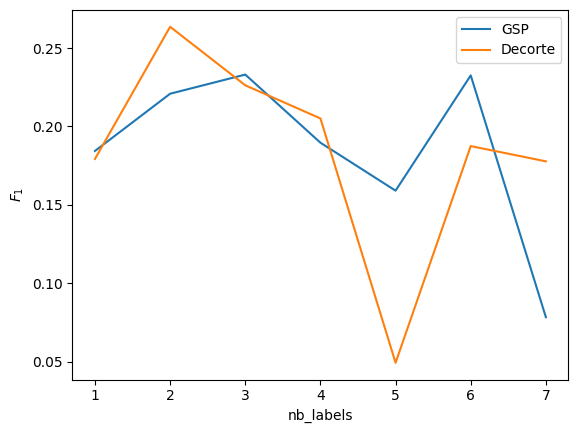

In [128]:
spf1 = list(zip(*sp_nblabelsres))[2]
decf1 = list(zip(*dec_nblabelsres))[2]
nb_labels = sp_nblabelsres.index.values

sns.lineplot(
    data=pd.DataFrame(
        {
            "nb_labels": nb_labels,
            "$F_1$": spf1
        }
    ),
    x="nb_labels",
    y="$F_1$",
    label="GSP"

)

sns.lineplot(
    data=pd.DataFrame(
        {
            "nb_labels": nb_labels,
            "$F_1$": decf1
        }
    ),
    x="nb_labels",
    y="$F_1$",
    label="Decorte"

)

### Study the skill length

<Axes: xlabel='skill_len', ylabel='Count'>

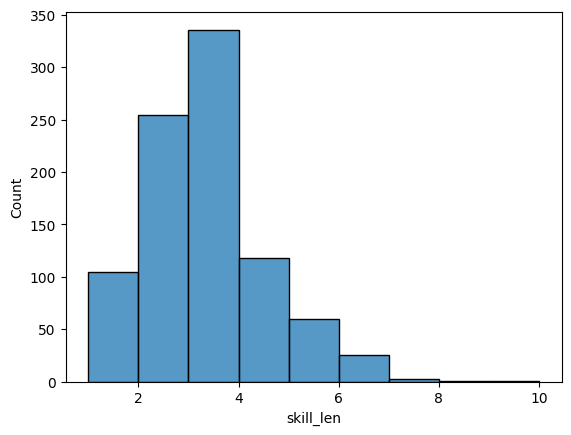

In [174]:
exdecpreds["skill_len"] = exdecpreds["gold"].apply(lambda x : len(tokenizer.tokenize(x)))
sns.histplot(
    data=exdecpreds,
    x="skill_len",
    binwidth=1
)

In [193]:
print(exdecpreds[["gold", "predictions"]].apply(
    lambda x: x["gold"] in x["predictions"], axis=1
).mean())
print(exsppreds[["gold", "predictions"]].apply(
    lambda x: x["gold"] in x["predictions"], axis=1
).mean())

0.26274944567627495
0.2394678492239468


In [191]:
print("For shots half label on Decorte")
print(exdecpreds[exdecpreds.skill_len <= 4][["gold", "predictions"]].apply(
    lambda x: x["gold"] in x["predictions"], axis=1
).mean())

print("For long half label on Decorte")
print(exdecpreds[exdecpreds.skill_len > 4][["gold", "predictions"]].apply(
    lambda x: x["gold"] in x["predictions"], axis=1
).mean())

For shots half label on Decorte
0.26199261992619927
For long half label on Decorte
0.2696629213483146


In [192]:
exsppreds["skill_len"] = exsppreds["gold"].apply(lambda x : len(tokenizer.tokenize(x)))

print("For shots half label on GSP")
print(exsppreds[exsppreds.skill_len <= 4][["gold", "predictions"]].apply(
    lambda x: x["gold"] in x["predictions"], axis=1
).mean())

print("For long half label on GSP")
print(exsppreds[exsppreds.skill_len > 4][["gold", "predictions"]].apply(
    lambda x: x["gold"] in x["predictions"], axis=1
).mean())

For shots half label on GSP
0.23370233702337023
For long half label on GSP
0.29213483146067415


## Full Analysis

(1, 5.0, 7.0, 8.0, 10.0, 12.0, 15.0, 19.0, 23.0, 29.0)


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/

(1, 5.0, 7.0, 8.0, 10.0, 12.0, 15.0, 19.0, 23.0, 29.0)


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/

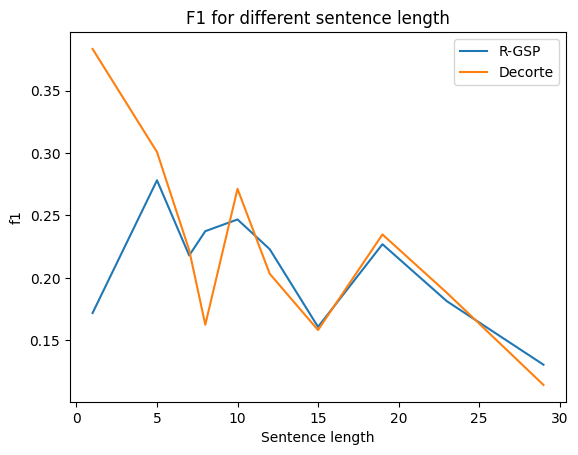

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/

Predicted labels per similarity in R-GSP :
qinter
(0.0, 0.25]    0.259259
(0.25, 0.5]    0.205195
(0.5, 0.75]    0.341463
(0.75, 1.0]    0.361702
dtype: float64
Predicted labels per similarity in Decorte : 
qinter
(0.0, 0.25]    0.333333
(0.25, 0.5]    0.233766
(0.5, 0.75]    0.292683
(0.75, 1.0]    0.436170
dtype: float64
For shots half label on R-GSP
0.23370233702337023
For long half label on R-GSP
0.29213483146067415
For shots half label on Decorte
0.26199261992619927
For long half label on Decorte
0.2696629213483146


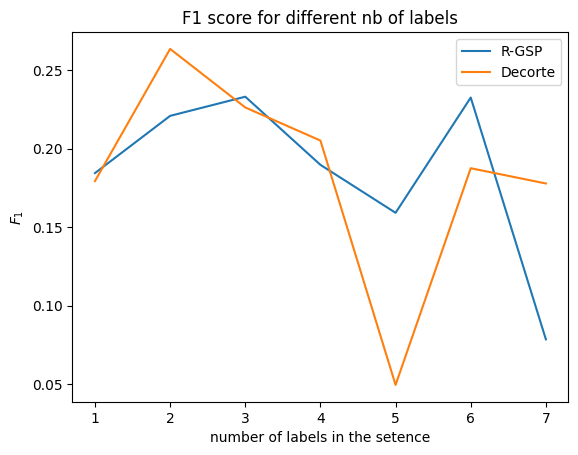

In [13]:
from matplotlib import pyplot as plt
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def study_discriminant(sppreds, decpreds, model_type1, model_type2, label1, label2):
    def gold_and_sentence_inter(gold, sentence):
        goldw = list(set(tokenizer.tokenize(gold)))
        return len([w for w in goldw if w in sentence]) / len(goldw)


    def state_on_conditional_df(subdf, modtype):
        TP = subdf.explode("predictions")[["predictions", "gold"]].apply(
            lambda x : x["predictions"] in x["gold"]
        , axis=1).sum() ## TP

        FP = subdf.explode("predictions")[["predictions", "gold"]].apply(
            lambda x : x["predictions"] not in x["gold"]
        , axis=1).sum()

        exgold = subdf.explode("gold")
        if(modtype != "classif"):
            exgold = exgold[exgold.gold != "UNK"]
        FN = exgold[["predictions", "gold"]].apply(
            lambda x : x["gold"] not in x["predictions"]
        , axis=1).sum()

        P = TP / (TP + FP) if (TP + FP != 0) else 0
        R = TP / (TP + FN) if (TP + FN != 0) else 0
        f1 = 2*R*P / (P + R) if (P + R) != 0 else 0

        return P, R, f1


    def stat_for_sentence_length(df, modtype):

        equalpop_splits = [df.st_len.min()] + [np.percentile(decpreds.st_len, i*10) for i in range(1, 10)] + [df.st_len.max()]
        splits = []
        stats = []
        for i, split in enumerate(equalpop_splits[:-1]):
            splits.append(
                df[(df.st_len >= split) & (df.st_len < equalpop_splits[i + 1])]
            )

            stats.append([[split, equalpop_splits[i + 1]], state_on_conditional_df(splits[-1], modtype)[2]])
        return stats

    def plot_evolution_length(stats, label):
        bins, f1s = zip(*stats)
        bins = list(zip(*bins))[0]
        print(bins)

        return sns.lineplot(
                pd.DataFrame.from_dict({
                'quantiles': bins,
                'f1': f1s,
            }), x="quantiles", y="f1", label=label
        )



    decpreds["st_len"] = decpreds["sentence"].apply(lambda x : len(tokenizer.tokenize(x)))
    sppreds["st_len"] = sppreds["sentence"].apply(lambda x : len(tokenizer.tokenize(x)))
    ### Sentence length #####################################################
    plot_evolution_length(stat_for_sentence_length(sppreds, model_type1), label1)
    g = plot_evolution_length(stat_for_sentence_length(decpreds, model_type2), label2)
    g.set_title("F1 for different sentence length")
    g.set_xlabel('Sentence length')
    plt.show()


    ### Number of labels ######################################################
    CLIP = 7
    sppreds["nb_labels"] = sppreds["gold"].apply(len)
    decpreds["nb_labels"] = decpreds["gold"].apply(len)
    sppreds["nb_labels"] = sppreds["nb_labels"].apply(lambda x : x if x < CLIP else CLIP) ## clipped at 6
    decpreds["nb_labels"] = decpreds["nb_labels"].apply(lambda x : x if x < CLIP else CLIP) ## clipped at 6

    sp_nblabelsres = sppreds.groupby("nb_labels").apply(
        lambda x : state_on_conditional_df(x, model_type1)
    )
    dec_nblabelsres = decpreds.groupby("nb_labels").apply(
        lambda x : state_on_conditional_df(x, model_type2)
    )
    spf1 = list(zip(*sp_nblabelsres))[2]
    decf1 = list(zip(*dec_nblabelsres))[2]
    nb_labels = sp_nblabelsres.index.values

    sns.lineplot(
        data=pd.DataFrame(
            {
                "nb_labels": nb_labels,
                "$F_1$": spf1
            }
        ),
        x="nb_labels",
        y="$F_1$",
        label=label1
    )

    g = sns.lineplot(
        data=pd.DataFrame(
            {
                "nb_labels": nb_labels,
                "$F_1$": decf1
            }
        ),
        x="nb_labels",
        y="$F_1$",
        label=label2
    )
    g.set_title("F1 score for different nb of labels")
    g.set_xlabel("number of labels in the setence")


    #### IMPLCIT AND EXPLICITNESS #####################
    exsppreds = sppreds.explode("gold")
    exsppreds = exsppreds[exsppreds.gold != "UNK"]
    exsppreds["inter"]  = exsppreds[["gold", "sentence"]].apply(
        lambda x : gold_and_sentence_inter(x["gold"], x["sentence"])
    , axis=1)

    exdecpreds = decpreds.explode("gold")
    exdecpreds = exdecpreds[exdecpreds.gold != "UNK"]
    exdecpreds["inter"]  = exdecpreds[["gold", "sentence"]].apply(
        lambda x : gold_and_sentence_inter(x["gold"], x["sentence"])
    , axis=1)

    def agg(gdf):
        return gdf[["gold", "predictions"]].apply(
            lambda x : x["gold"] in x["predictions"], axis=1
        ).mean()
    exsppreds["qinter"] = pd.cut(exsppreds["inter"], bins = [0, 0.25, 0.5, 0.75, 1])
    exdecpreds["qinter"] = pd.cut(exdecpreds["inter"], bins = [0, 0.25, 0.5, 0.75, 1])
    print(f"Predicted labels per similarity in {label1} :")
    print(exsppreds.groupby("qinter").apply(agg))
    print(f"Predicted labels per similarity in {label2} : ")
    print(exdecpreds.groupby("qinter").apply(agg))


    exsppreds["skill_len"] = exsppreds["gold"].apply(lambda x : len(tokenizer.tokenize(x)))
    exdecpreds["skill_len"] = exdecpreds["gold"].apply(lambda x : len(tokenizer.tokenize(x)))

    print(f"For shots half label on {label1}")
    print(exsppreds[exsppreds.skill_len <= 4][["gold", "predictions"]].apply(
        lambda x: x["gold"] in x["predictions"], axis=1
    ).mean())

    print(f"For long half label on {label1}")
    print(exsppreds[exsppreds.skill_len > 4][["gold", "predictions"]].apply(
        lambda x: x["gold"] in x["predictions"], axis=1
    ).mean())

    print(f"For shots half label on {label2}")
    print(exdecpreds[exdecpreds.skill_len <= 4][["gold", "predictions"]].apply(
        lambda x: x["gold"] in x["predictions"], axis=1
    ).mean())

    print(f"For long half label on {label2}")
    print(exdecpreds[exdecpreds.skill_len > 4][["gold", "predictions"]].apply(
        lambda x: x["gold"] in x["predictions"], axis=1
    ).mean())


study_discriminant(sppreds, decpreds, model_type1="classif", model_type2="classif", label1="R-GSP", label2="Decorte")
    

In [146]:
from datasets import load_dataset
ds = pd.DataFrame(
    load_dataset("jensjorisdecorte/Synthetic-ESCO-skill-sentences")["train"]
)


count    138260.000000
mean         15.985737
std           4.240586
min           4.000000
25%          13.000000
50%          16.000000
75%          19.000000
max          53.000000
Name: ds_len, dtype: float64

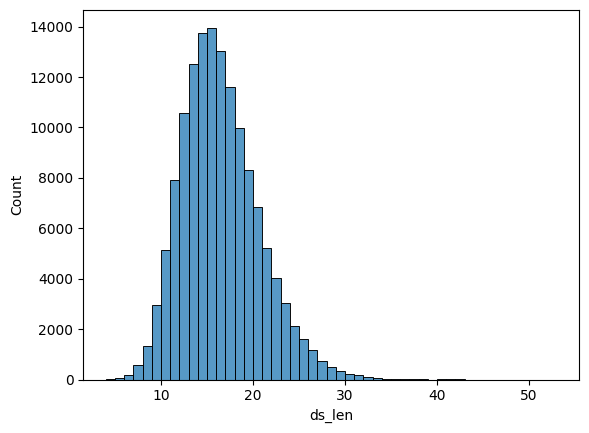

In [150]:
ds["ds_len"] = ds["sentence"].apply(lambda x : len(tokenizer.tokenize(x)))
sns.histplot(
    data=ds, 
    x="ds_len",
    binwidth=1,
)

ds.ds_len.describe()

count    6353.000000
mean       28.868566
std         8.657611
min        11.000000
25%        23.000000
50%        28.000000
75%        33.000000
max       274.000000
Name: slen, dtype: float64

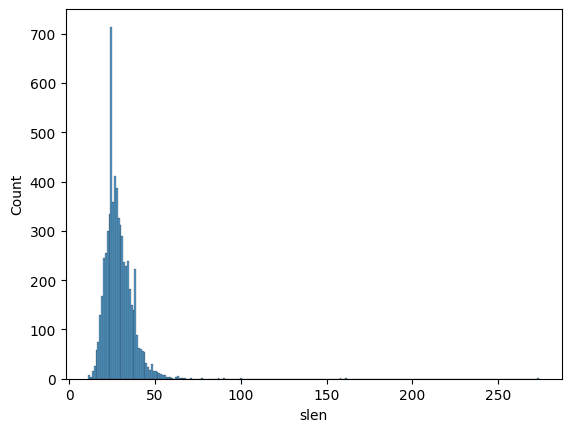

In [158]:
sp = pd.read_csv("./generation/generated/SKILLSPAN/train_final.csv").dropna()
sp["slen"] = sp["sentence"].apply(
    lambda x: len(tokenizer.tokenize(x))
)


sns.histplot(
    data=sp, x="slen"
)
sp.slen.describe()

In [169]:
len(ds[ds.ds_len < 10]), len(sp[sp.slen < 10])

(5107, 0)

In [199]:
from tqdm.notebook import tqdm

tqdm.pandas()

with open("generation/generated/DECORTE/ANNOTATED_SUPPORT_SET.pkl", 'rb') as f:
    annot_dec = pickle.load(f)

annot_dec = annot_dec.explode("annot_spans")
annot_dec["span_len"] = annot_dec.annot_spans.progress_apply(
    lambda x : len(tokenizer.tokenize(x))
)

  0%|          | 0/9987 [00:00<?, ?it/s]

In [200]:
annot_dec["span_len"].describe()

count    9987.000000
mean        7.326024
std         4.893605
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        44.000000
Name: span_len, dtype: float64

<Axes: xlabel='span_len', ylabel='Count'>

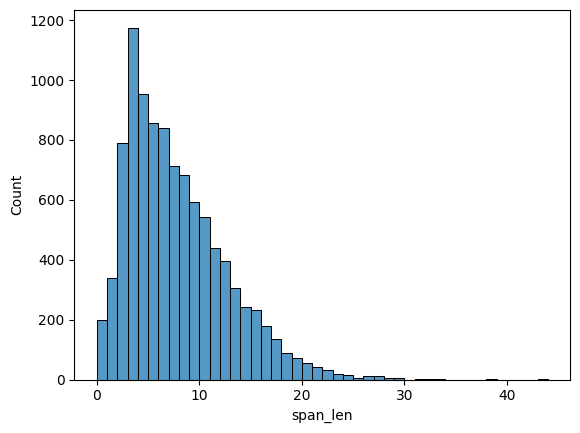

In [202]:
sns.histplot(data=annot_dec, x="span_len", binwidth=1)

In [210]:
from tqdm.notebook import tqdm

tqdm.pandas()

with open("generation/generated/R-SKILLSPAN/ANNOTATED_SUPPORT_SET.pkl", 'rb') as f:
    annot_sp = pickle.load(f)

annot_sp = annot_sp.explode("annot_spans")
annot_sp["span_len"] = annot_sp.annot_spans.progress_apply(
    lambda x : len(tokenizer.tokenize(x))
)

  0%|          | 0/12958 [00:00<?, ?it/s]

count    12958.000000
mean         5.085276
std          2.911771
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         36.000000
Name: span_len, dtype: float64

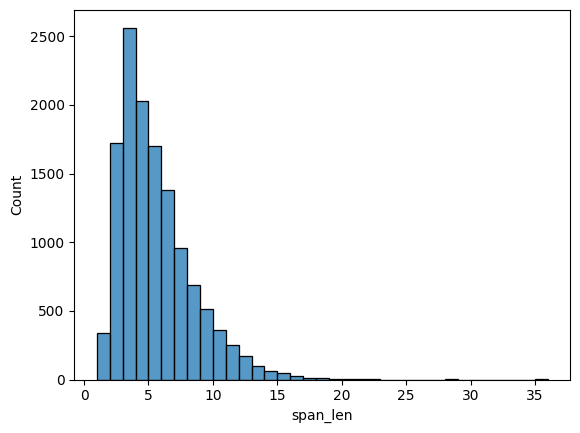

In [211]:
sns.histplot(data=annot_sp, x="span_len", binwidth=1)
annot_sp["span_len"].describe()

### Applied for pipeline results :

In [6]:
## is it the last GENSS predictions
with open("/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/preds_support_type_kNN_support_size_match_1_nb_candidates_5_support_size_extr_7_test.pkl", "rb") as f:
    rgss = pickle.load(f)

In [50]:
def prepare_preds(pred_file):
    with open(pred_file, "rb") as f:
        rgss = pickle.load(f)
    prep = []
    for rgss_entry in rgss:
        rgss_entry = rgss_entry[0]

        extracted_spans = [sk for sk in rgss_entry["extracted_skills"]]
        matched_skills = [
            rgss_entry["matched_skills"][sk]["name+definition"].split(" : ") for sk in extracted_spans
            if sk in rgss_entry["matched_skills"]
        ]
        
        prep.append({
            "gold": rgss_entry["skills"],
            "predictions": sum(matched_skills, []),
            "sentence": rgss_entry["sentence"]
        })
    return pd.DataFrame(prep)


(0.125544267053701, 0.23747426218256693, 0.16425350106812248)

(1, 5.0, 7.0, 8.0, 10.0, 12.0, 15.0, 19.0, 23.0, 29.0)


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/

(1, 5.0, 7.0, 8.0, 10.0, 12.0, 15.0, 19.0, 23.0, 29.0)


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/

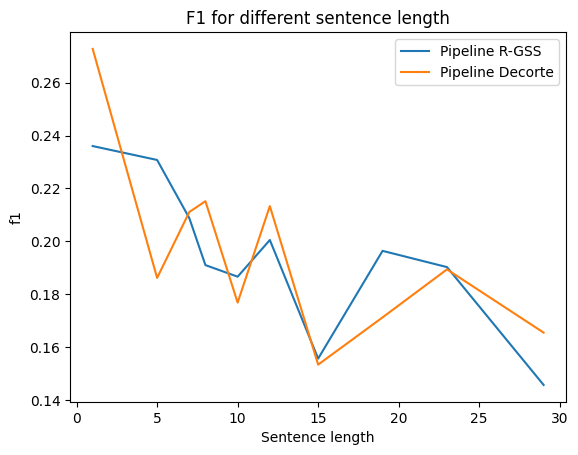

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/

Predicted labels per similarity in Pipeline R-GSS :
qinter
(0.0, 0.25]    0.462963
(0.25, 0.5]    0.348052
(0.5, 0.75]    0.390244
(0.75, 1.0]    0.521277
dtype: float64
Predicted labels per similarity in Pipeline Decorte : 
qinter
(0.0, 0.25]    0.351852
(0.25, 0.5]    0.327273
(0.5, 0.75]    0.463415
(0.75, 1.0]    0.500000
dtype: float64
For shots half label on Pipeline R-GSS
0.34809348093480935
For long half label on Pipeline R-GSS
0.4157303370786517
For shots half label on Pipeline Decorte
0.3284132841328413
For long half label on Pipeline Decorte
0.43820224719101125


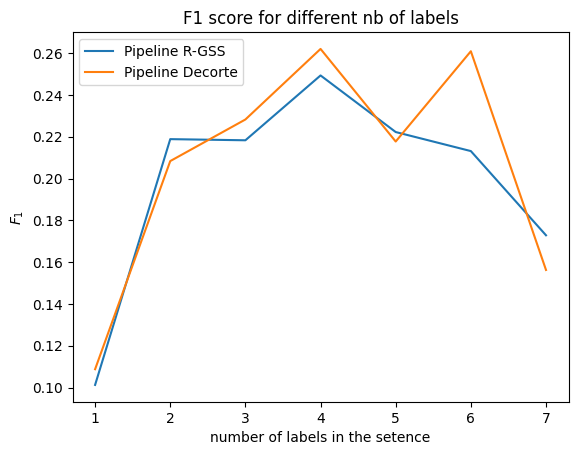

In [74]:
study_discriminant(
    prepare_preds("/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/pred_RGSS_SkillSpan.out"),
    prepare_preds("/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/SkillThrills/protosp01/dataset_generation/preds_Decorte_SkillSpan.out"),
    model_type1="pipe",
    model_type2="pipe",
    label1="Pipeline R-GSS",
    label2="Pipeline Decorte"
)

In [14]:
from datasets import load_dataset
from tqdm.notebook import tqdm
tqdm.pandas()

ds = pd.DataFrame(
    load_dataset("jensjorisdecorte/Synthetic-ESCO-skill-sentences")["train"]
)
ds["slen"] = ds["sentence"].progress_apply(lambda x : len(tokenizer.tokenize(x)))


sp = pd.read_csv("./generation/generated/SKILLSPAN/train_final.csv").dropna()
sp["slen"] = sp["sentence"].progress_apply(
    lambda x: len(tokenizer.tokenize(x))
)

testsp["slen"] = testsp.sentence.apply(
    lambda x : len(tokenizer.tokenize(x))
)


  0%|          | 0/138260 [00:00<?, ?it/s]

  0%|          | 0/6353 [00:00<?, ?it/s]

In [15]:
def bounds(df, percent=90):
    lb = 50 - percent / 2
    ub = 50 + percent / 2
    return [np.percentile(df.slen, lb), np.percentile(df.slen, ub)]


PERCENT = 50
print("For 50% : ")
print("RGSS : ", bounds(sp, percent=PERCENT))
print("Decorte : ", bounds(ds, percent=PERCENT))
print("SkillSpan : ", bounds(testsp, percent=PERCENT))


PERCENT = 90
print("For 90% : ")
print("RGSS : ", bounds(sp, percent=PERCENT))
print("Decorte : ", bounds(ds, percent=PERCENT))
print("SkillSpan : ", bounds(testsp, percent=PERCENT))

For 50% : 
RGSS :  [23.0, 33.0]
Decorte :  [13.0, 19.0]
SkillSpan :  [7.5, 20.0]
For 90% : 
RGSS :  [19.0, 43.0]
Decorte :  [10.0, 24.0]
SkillSpan :  [3.0, 39.0]


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


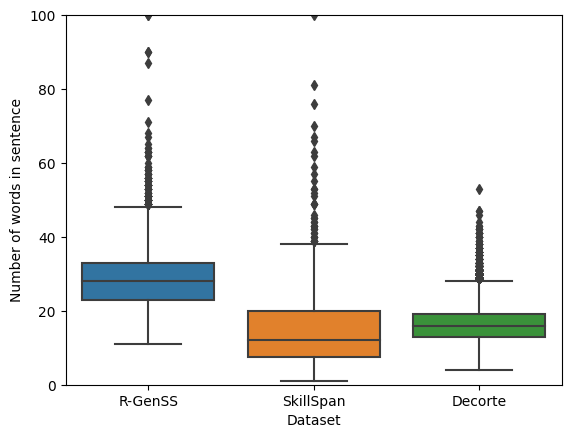

In [19]:
sp["origin"] = "R-GenSS"
testsp["origin"] = "SkillSpan"
ds["origin"] = "Decorte"

g = sns.boxplot(
    data=pd.concat([sp, testsp, ds]),
    x="origin",
    y="slen"
)

g.set_ylabel("Number of words in sentence")
g.set_xlabel("Dataset")


g.set_ylim((0, 100))

plt.savefig("sentence_len_distrib.pdf", dpi=1000)

## Error analysis conclusion

#### Sentence length disrtibution is really different

In [18]:
def bounds(df, percent=90):
    lb = 50 - percent / 2
    ub = 50 + percent / 2
    return [np.percentile(df.slen, lb), np.percentile(df.slen, ub)]


PERCENT = 50
print("For 50% : ")
print("RGSS : ", bounds(sp, percent=PERCENT))
print("Decorte : ", bounds(ds, percent=PERCENT))
print("SkillSpan : ", bounds(testsp, percent=PERCENT))


PERCENT = 90
print("For 90% : ")
print("RGSS : ", bounds(sp, percent=PERCENT))
print("Decorte : ", bounds(ds, percent=PERCENT))
print("SkillSpan : ", bounds(testsp, percent=PERCENT))

For 50% : 
RGSS :  [23.0, 33.0]
Decorte :  [13.0, 19.0]
SkillSpan :  [7.5, 20.0]
For 90% : 
RGSS :  [19.0, 43.0]
Decorte :  [10.0, 24.0]
SkillSpan :  [3.0, 39.0]


#### Proportion of sentence not starting with Maj in TEST and DEV SKILLSPAn

In [20]:
print("Proprtion of test not starting with a Maj, Proprtion of dev not starting with a Maj : ")
(testsp.sentence.apply(lambda x: x[0].isalpha() and x[0].upper() == x[0]).mean(),
devsp.sentence.apply(lambda x: x[0].isalpha() and x[0].upper() == x[0]).mean())

Proprtion of test not starting with a Maj, Proprtion of dev not starting with a Maj : 


(0.8548601864181092, 0.6179775280898876)

#### Proportion of predicted `UNK` for classifier

In [25]:
print("Portion of predicted UNK for R-GSS")
print(sppreds[sppreds.gold.apply(lambda x : "UNK" in x)]\
        .predictions.apply(lambda x : "UNK" in x).mean())
print("Portion of predicted UNK for Decorte")
print(decpreds[decpreds.gold.apply(lambda x : "UNK" in x)]\
        .predictions.apply(lambda x : "UNK" in x).mean())


Portion of predicted UNK for R-GSS
0.10467289719626169
Portion of predicted UNK for Decorte
0.0


### Proportion of prediction when the only label is `UNK`

In [28]:
print("Portion of predicted UNK for R-GSS")
print(sppreds[sppreds.gold.apply(lambda x : ["UNK"] == x)]\
        .predictions.apply(lambda x : "UNK" in x).mean())
print("Portion of predicted UNK for Decorte")
print(decpreds[decpreds.gold.apply(lambda x : ["UNK"] == x)]\
        .predictions.apply(lambda x : "UNK" in x).mean())


Portion of predicted UNK for R-GSS
0.13852813852813853
Portion of predicted UNK for Decorte
0.0


#### Performance for sentence length

In [63]:
CUT = testsp.slen.median()

print("FOR MODEL TRAIN ON R-gss :")
print("Performance on the longest half of the sentence")
state_on_conditional_df(sppreds[sppreds.st_len > CUT])
print("*"*100)
print("Performance on the shortest half of the sentence")
state_on_conditional_df(sppreds[sppreds.st_len < CUT])

FOR MODEL TRAIN ON R-gss :
Performance on the longest half of the sentence
R :  0.16069221260815822
P :  0.20569620253164558
f1 :  0.1804302567661346
****************************************************************************************************
Performance on the shortest half of the sentence
R :  0.22887323943661972
P :  0.24528301886792453
f1 :  0.23679417122040075


(0.24528301886792453, 0.22887323943661972, 0.23679417122040075)

In [50]:
CUT = testsp.slen.median()


print("FOR MODEL TRAINED ON Decorte :")
print("Performance on the longest half of the sentence")
state_on_conditional_df(decpreds[decpreds.st_len > CUT])
print("*"*100)
print("Performance on the shortest half of the sentence")
state_on_conditional_df(decpreds[decpreds.st_len < CUT])

FOR MODEL TRAINED ON Decorte :
Performance on the longest half of the sentence
R :  0.12855377008652658
P :  0.26735218508997427
f1 :  0.17362270450751252
****************************************************************************************************
Performance on the shortest half of the sentence
R :  0.21654929577464788
P :  0.33064516129032256
f1 :  0.26170212765957446


(0.33064516129032256, 0.21654929577464788, 0.26170212765957446)

In [62]:
CUT_H = np.percentile(testsp.slen.values, 80)
CUT_L = np.percentile(testsp.slen.values, 20)

print("Perf of R-GSS on the top 20% of longuest sentences: ")
state_on_conditional_df(sppreds[sppreds.st_len > CUT_H])
print("*"*100)
print("Perf of R-GSS on the bottom 20% of longuest sentences: ")
state_on_conditional_df(sppreds[sppreds.st_len < CUT_L])

Perf of R-GSS on the top 20% of longuest sentences: 
R :  0.13267813267813267
P :  0.1956521739130435
f1 :  0.1581259150805271
****************************************************************************************************
Perf of R-GSS on the bottom 20% of longuest sentences: 
R :  0.22666666666666666
P :  0.25
f1 :  0.23776223776223773


(0.25, 0.22666666666666666, 0.23776223776223773)

In [61]:
CUT_H = np.percentile(testsp.slen.values, 80)
CUT_L = np.percentile(testsp.slen.values, 20)

print("Perf of Decorte on the top 20% of longuest sentences: ")
state_on_conditional_df(decpreds[decpreds.st_len > CUT_H])
print("*"*100)
print("Perf of Decorte on the bottom 20% of longuest sentences: ")
state_on_conditional_df(decpreds[decpreds.st_len < CUT_L])

Perf of Decorte on the top 10% of longuest sentences: 
R :  0.10319410319410319
P :  0.2641509433962264
f1 :  0.14840989399293283
****************************************************************************************************
Perf of Decorte on the bottom 10% of longuest sentences: 
R :  0.27555555555555555
P :  0.4217687074829932
f1 :  0.3333333333333333


(0.4217687074829932, 0.27555555555555555, 0.3333333333333333)

With all the sentences length :

``````
************************* R-GSS : *************************
SHORT SENTENCE 1  (LOW QUARTILE more than 7.5  words)
R :  0.21935483870967742
P :  0.24727272727272728
f1 :  0.23247863247863249
SHORT SENTENCE 2 (MIDLOW QUARTILE between  (7.5, 12.0)  words)
R :  0.24031007751937986
P :  0.24313725490196078
f1 :  0.24171539961013647
LONGER SENTENCE (MIDTOP QUARTILE  between (12.0, 20.0)  words)
R :  0.20059880239520958
P :  0.22112211221122113
f1 :  0.21036106750392464
LONG SENTENCE (TOP QUARTILE more than 20.0  words)
R :  0.13402061855670103
P :  0.18840579710144928
f1 :  0.15662650602409636
************************* DECORTE : *************************
SHORT SENTENCE 1  (LOW QUARTILE more than 7.5  words)
R :  0.24838709677419354
P :  0.39086294416243655
f1 :  0.3037475345167653
SHORT SENTENCE 2 (MIDLOW QUARTILE between  (7.5, 12.0)  words)
R :  0.17829457364341086
P :  0.26285714285714284
f1 :  0.21247113163972287
LONGER SENTENCE (MIDTOP QUARTILE  between (12.0, 20.0)  words)
R :  0.1407185628742515
P :  0.23737373737373738
f1 :  0.17669172932330826
LONG SENTENCE (TOP QUARTILE more than 20.0  words)
R :  0.11958762886597939
P :  0.2885572139303483
f1 :  0.16909620991253646
``````

See that for longuest sentences, R-GSS works better than Decorte and the latter works better on the shortest sentences.

#### Number of sentences : 

In [57]:
from nltk import tokenize

sp["nb_sentence"] = sp.sentence.apply(
    lambda x : len(tokenize.sent_tokenize(x))
)

sp.nb_sentence.value_counts()

nb_sentence
1     6022
2      318
3        7
5        2
4        2
9        1
16       1
Name: count, dtype: int64

#### Implicitness of label


```
Predicted labels per similarity in R-GSP :
qinter
(0.0, 0.25]    0.259259
(0.25, 0.5]    0.205195
(0.5, 0.75]    0.341463
(0.75, 1.0]    0.361702
dtype: float64
Predicted labels per similarity in Decorte : 
qinter
(0.0, 0.25]    0.333333
(0.25, 0.5]    0.233766
(0.5, 0.75]    0.292683
(0.75, 1.0]    0.436170
```

We can see the perf for the 25% lowest similarity, the top 25% etc... they are quartile.

### For matching, R-GSS is slightly above, similar stats, slightly above for R-GSS

- interesting point : R-GENSS and Decorte are retrieved with same proba for both parts (extraction, matching)